In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

#Import loggings
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log', force = True)

#Import Sci-kit Learn Libraries for model building
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

#Importing Metrics for Regression Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [2]:
logging.info('Import Dataset...')

In [3]:
url = 'https://raw.githubusercontent.com/anirudhakolay/CementPrediction_Model/refs/heads/main/Concrete_Data%20(1).csv'
df = pd.read_csv(url)
df.sample(frac=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
792,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,360,42.13
694,236.0,157.0,0.0,192.0,0.0,972.6,749.1,28,32.88
913,298.0,0.0,107.0,164.0,13.0,953.0,784.0,28,35.86
616,277.0,0.0,0.0,191.0,0.0,968.0,856.0,360,33.70
519,284.0,15.0,141.0,179.0,5.5,842.0,801.0,28,43.73
...,...,...,...,...,...,...,...,...,...
894,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,29.72
896,313.0,161.0,0.0,178.0,10.0,917.0,759.0,28,52.44
965,330.5,169.6,0.0,194.9,8.1,811.0,802.3,28,56.62
826,480.0,0.0,0.0,192.0,0.0,936.0,721.0,3,24.39


In [4]:
#OLS Regression(Ordinary Least Square)
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import statsmodels.api as sm
X = df.drop(columns ='Concrete compressive strength(MPa, megapascals) ', axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [6]:
X = sm.add_constant(X)

In [7]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 05 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      20:12:47   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#Checking Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
#Checking Descriptive Stats: EDA
#Univariate Analysis
from collections import OrderedDict

stats = []
for i in df.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
      'Standard Deviation':df[i].std(),
      'Variance':df[i].var(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurt()
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report 

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,Variance,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,10921.580220,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,7444.124812,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,4095.616541,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,456.002651,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,35.686781,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,6045.677357,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,6428.187792,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3990.437729,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,279.081814,0.416977,-0.313725


In [10]:
# Postive or -ve skewness never impute with 'Mean', impute with 'Median'

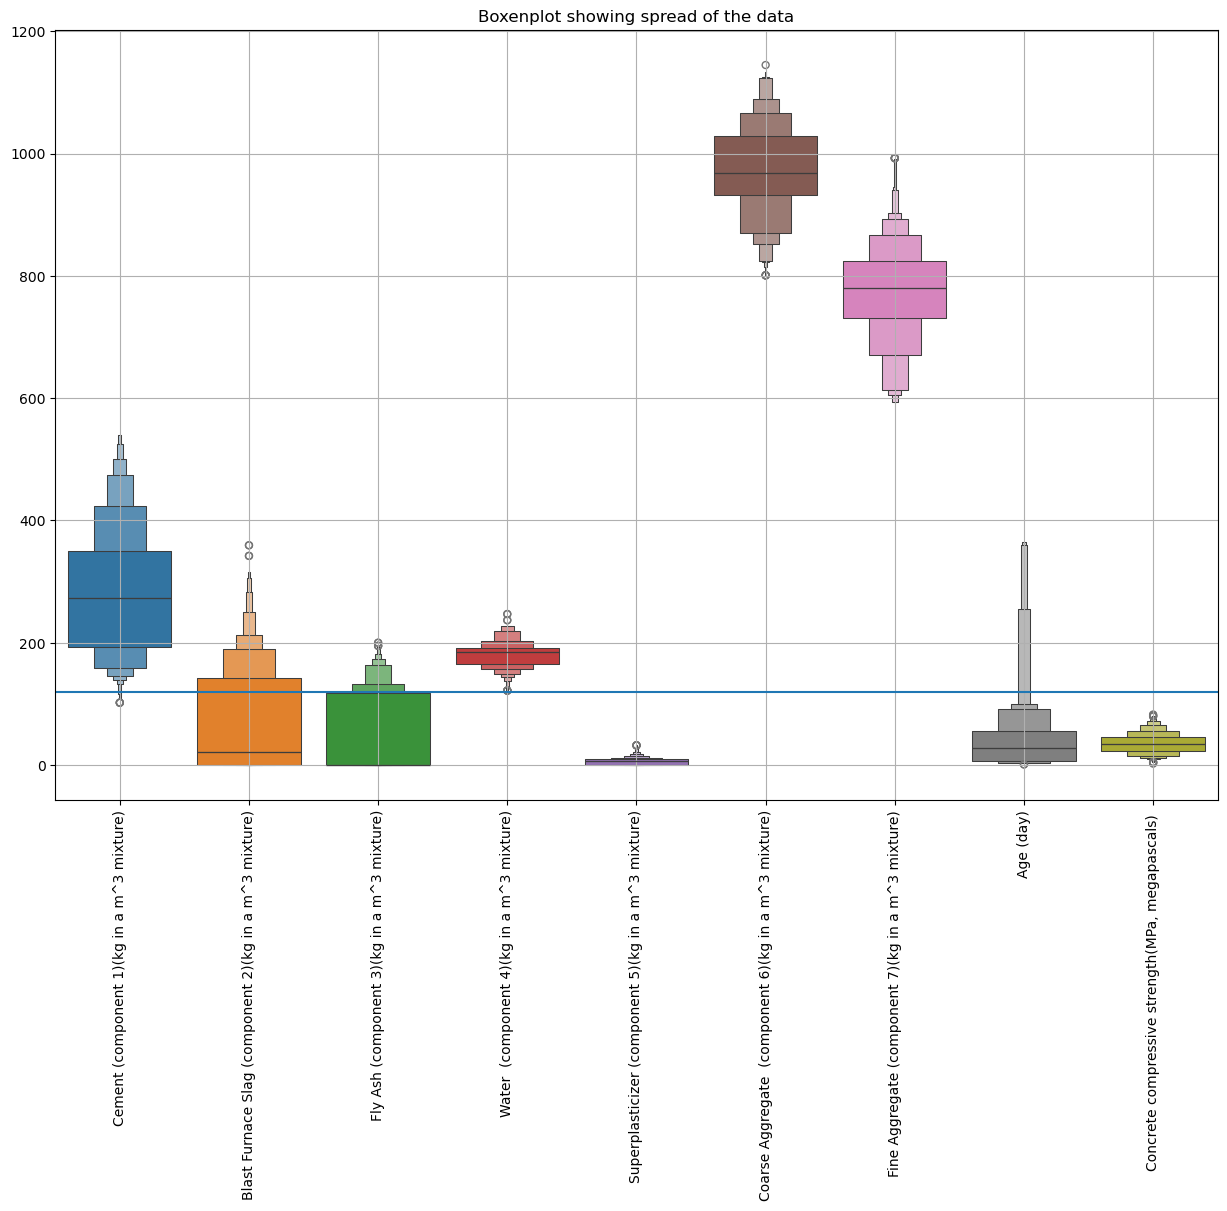

In [11]:
'''
NOte: If your data having +ve skewness or -ve skewness never ever impute with mean instead it should be imputed with MEDIAN
note(kurtosis)
1. positive kurtosis = leptokurtic 
2. normal dstribution = mesokurtic
3. negative kurtosis = platykurtic
.............................................
note (skewness)
1.positive skewness = mode<median<mean
2.No skewness = normaly distributed : mean = median = mode
3.Negative skewness = mean<median<mode
'''

plt.figure (figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title('Boxenplot showing spread of the data')
plt.grid()
plt.show()

In [12]:
df.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (component 3)(kg in a m^3 mixture),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (component 4)(kg in a m^3 mixture),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (component 5)(kg in a m^3 mixture),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
"Concrete compressive strength(MPa, megapascals)",0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Text(0.5, 1.0, 'Heatmap showing Correlation w.r.t. Target Column')

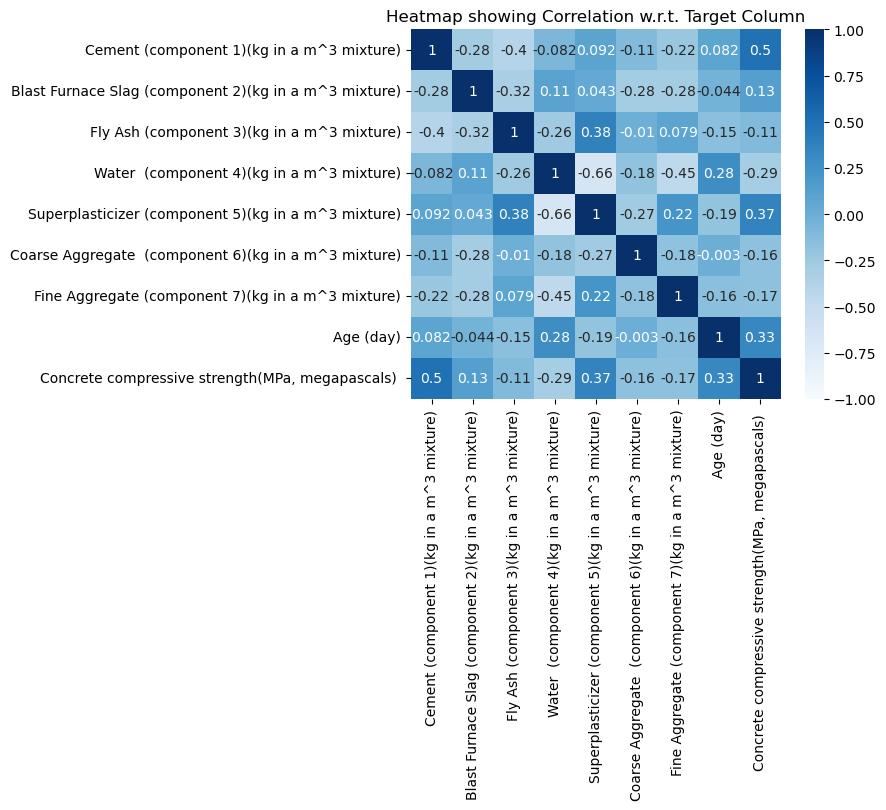

In [13]:
#last col of heatmap must be TARGET COLUMN
sns.heatmap(df.corr(), cbar=True, square=True, annot=True, center = 0, vmax = 1, vmin= -1, cmap='Blues')
plt.title('Heatmap showing Correlation w.r.t. Target Column')

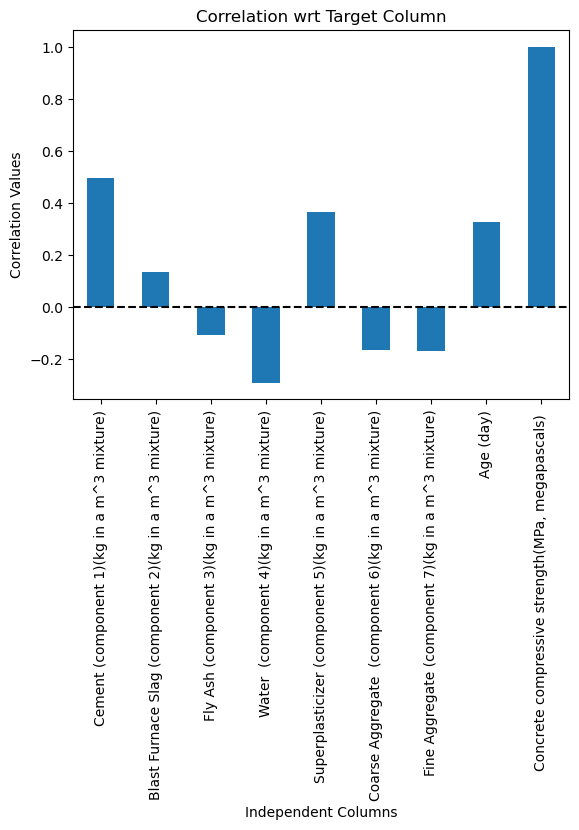

In [14]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'bar')
plt.axhline(0, linestyle = '--', color = 'black') #horizontal line
plt.title('Correlation wrt Target Column')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Columns')
plt.show()

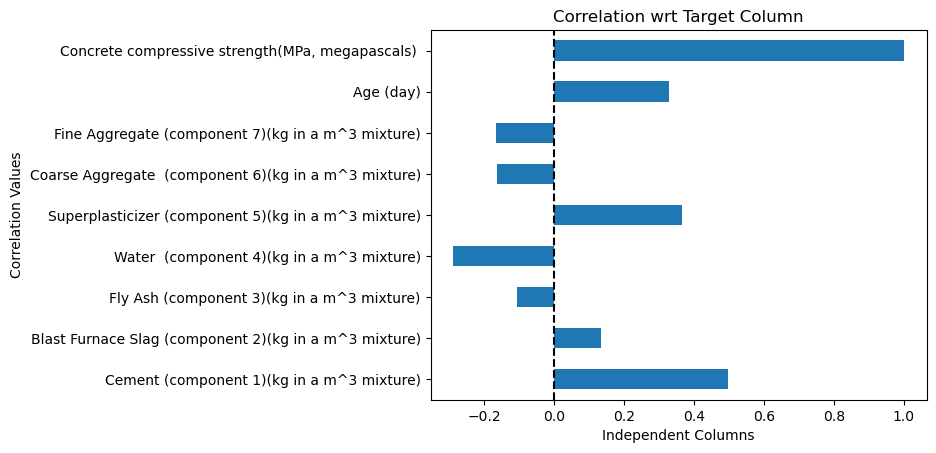

In [15]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh')
plt.axvline(0, linestyle = '--', color = 'black') #verticle line
plt.title('Correlation wrt Target Column')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Columns')
plt.show()

In [16]:
#Checking Top Five Rows of Dataset

'''
1. As the dataset contains no categorical column, hence no need of converting categorical column to numerical column.
2. No Missing Value is present in the dataset.
'''

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [17]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [18]:
#Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column

X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1) # drops inside X, but presnt in df
y = df['Concrete compressive strength(MPa, megapascals) ']

# Step 02: Using Train Test Split
#test_size lies between 0.20 to 0.35(20-30 is enough)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) 

# Step 03: Using Scaling Technique
sc = MinMaxScaler()

#Seen data
X_train = sc.fit_transform(X_train)

# Unseen Data
X_test = sc.transform(X_test)

In [19]:
X_train.max(), X_train.min() # perfect ranges between 0 and 1

(1.0000000000000002, 0.0)

In [20]:
#Model Building

In [21]:
#Linear Regression

from sklearn.linear_model import LinearRegression
#Fit model is always on training or seen dataset(test)
LR = LinearRegression().fit(X_train,y_train)
#Prediction value based on Unseen data
y_pred_LR = LR.predict(X_test)
#y_test =  actual, y_pred = predicted
print('Model Accuracy for Linear Regression', r2_score(y_test, y_pred_LR))

Model Accuracy for Linear Regression 0.5943782479239215


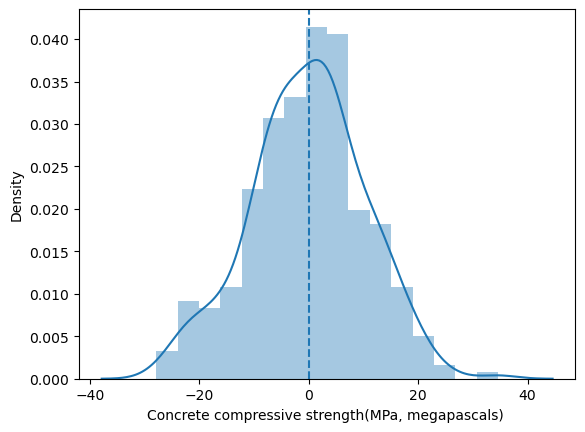

In [22]:
sns.distplot(y_test-y_pred_LR)
plt.axvline(0,linestyle= '--')

Text(0, 0.5, 'Y_pred')

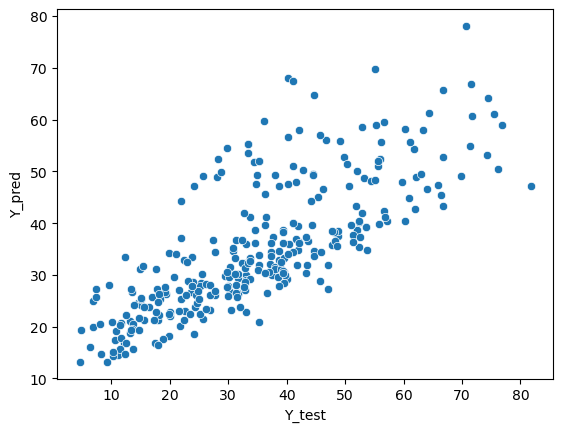

In [23]:
sns.scatterplot(x = y_test,y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

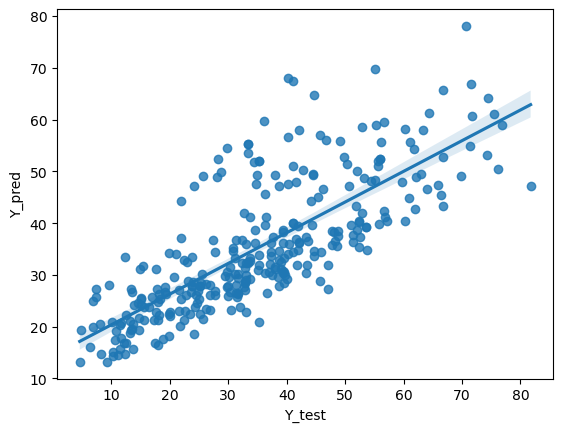

In [24]:
#Model Perfomance
sns.regplot(x = y_test,y = y_pred_LR) #regression plot
plt.xlabel('Y_test') #actual
plt.ylabel('Y_pred') #predicted value
plt.show() #some patterns n data points are not captured so accuracy decreases

In [25]:
#Evaluate Coefficient
LR.coef_ #coefficient*x+c, total 8 columns

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [26]:
#Evaluate Constant Value
LR.intercept_

-13.616932642237437

In [27]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('The Model Accuracy for Decision Tree Regressor', r2_score(y_test,y_pred_DT))

The Model Accuracy for Decision Tree Regressor 0.8199756001708223


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

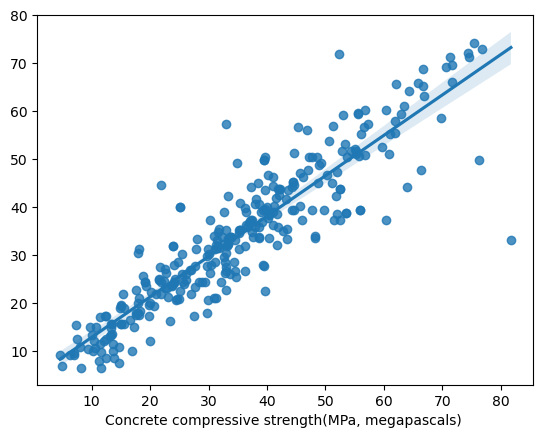

In [28]:
#Model Performance graph
sns.regplot(x = y_test, y = y_pred_DT)
#y_test - actual(x-axis), y_pred - predicted
#error avg/bias/loss
#Loss - Mean absolute error,mean squared error(used in ANN)


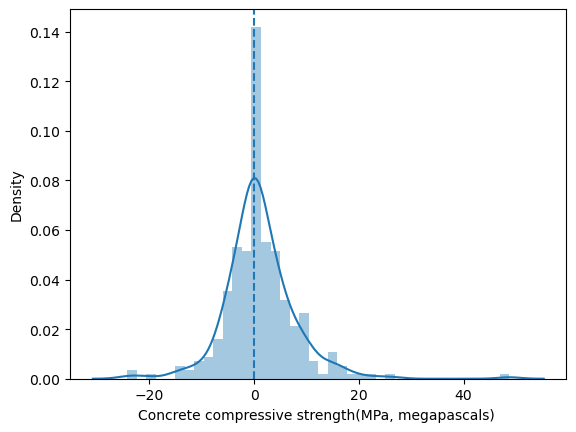

In [29]:
sns.distplot(y_test - y_pred_DT)
plt.axvline(0, linestyle = "--")

In [30]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for Decision Tree Regressor', r2_score(y_test,y_pred_RF))

The Model Accuracy for Decision Tree Regressor 0.8860803365595038


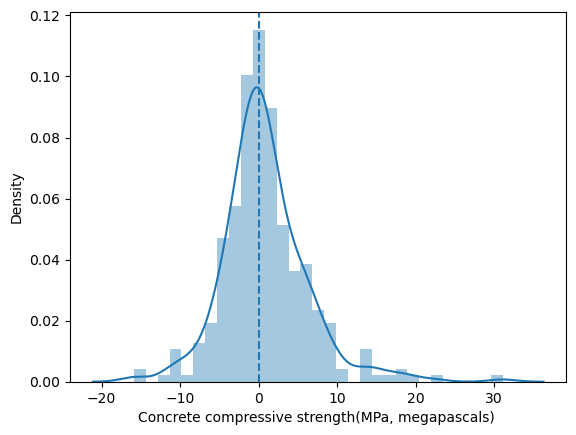

In [31]:
sns.distplot(y_test-y_pred_RF)
plt.axvline(0, linestyle = "--")

In [32]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

<Axes: >

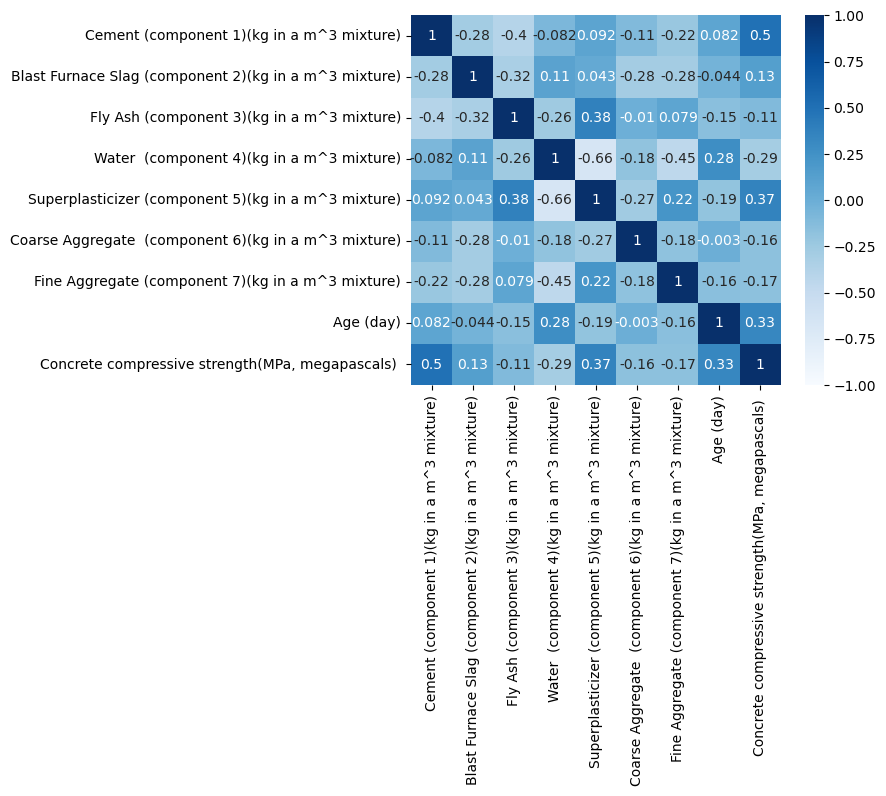

In [33]:
sns.heatmap(df.corr(), cbar=True, square=True, annot=True, center = 0, vmax = 1, vmin= -1, cmap='Blues')

In [34]:
RF.feature_importances_

array([0.33206891, 0.07235547, 0.02084452, 0.12300017, 0.06033668,
       0.02991188, 0.03361377, 0.3278686 ])

In [35]:
Features = RF.feature_importances_

In [36]:
feature_names = X.columns
importance_df = pd.Series(Features, index = feature_names)
importance_df

Cement (component 1)(kg in a m^3 mixture)                0.332069
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.072355
Fly Ash (component 3)(kg in a m^3 mixture)               0.020845
Water  (component 4)(kg in a m^3 mixture)                0.123000
Superplasticizer (component 5)(kg in a m^3 mixture)      0.060337
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.029912
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.033614
Age (day)                                                0.327869
dtype: float64

In [37]:
#Classifer- for binary nd  categoical
#Regressor- for numerical

In [38]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [39]:
# Boosting Algorithms
#Using XgBoost Algorithm
# pip install xgboost
import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor', r2_score(y_test,y_pred_xgb))

Model Accuracy for XGBoost Regressor 0.9104444067517969


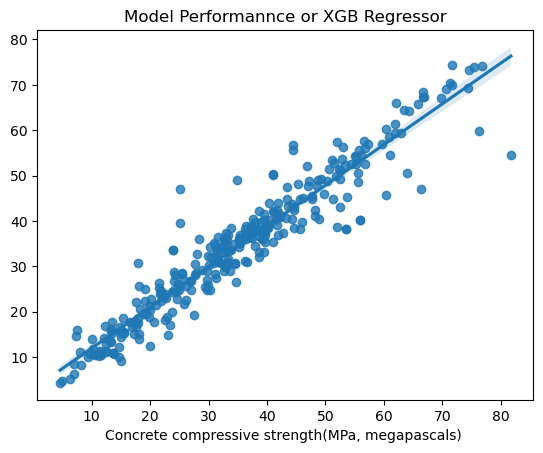

In [40]:
#Model Performance for XGB
sns.regplot(x = y_test, y = y_pred_xgb)
plt.title('Model Performannce or XGB Regressor')
plt.show()

In [41]:
#Using AdaBoosting ALgorithm
from sklearn.ensemble import AdaBoostRegressor
ADAB = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ADAB = ADAB.predict(X_test)

print('Model Accuracy for AdaBoost Regressor', r2_score(y_test,y_pred_ADAB))

Model Accuracy for AdaBoost Regressor 0.7879488057436115


In [42]:
#Using Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingRegressor
GRE = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GRE = GRE.predict(X_test)

print('Model Accuracy for AdaBoost Regressor', r2_score(y_test,y_pred_GRE))

Model Accuracy for AdaBoost Regressor 0.8907924163902455


In [43]:
#Using KNN Algorithm
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor().fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)

print('Model Accuracy for KNN Regressor', r2_score(y_test,y_pred_KNN))

Model Accuracy for KNN Regressor 0.6457281524418169


In [44]:
'''
Parameters:
CV stands for Cross Validation
1. Random search CV(Validating model)
2. Grid Search CV

n_estimator - int, default :- 100
max_depth : - int ,default :- None
min_sample_split :- int or float, default :-2
min_sample_leaf :- int or float, default :- 1
'''

'\nParameters:\nCV stands for Cross Validation\n1. Random search CV(Validating model)\n2. Grid Search CV\n\nn_estimator - int, default :- 100\nmax_depth : - int ,default :- None\nmin_sample_split :- int or float, default :-2\nmin_sample_leaf :- int or float, default :- 1\n'

In [46]:
# Model Validation Technique and Finding Best Tuning for Model
from sklearn.model_selection import RandomizedSearchCV

#Initialize the model
RF = RandomForestRegressor(random_state = 42)

#Define hyperparameter grid based on RandomForest Parameters
param_dist = {
    'n_estimators': [100,200,300,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto','sqrt','log2']
}

#RandomizedSearchCV setup considering Randomsearchcv parameters
random_search = RandomizedSearchCV(
    estimator = RF,
    param_distributions = param_dist,
    n_iter=50,
    cv=5,
    scoring= 'r2',
    random_state = 42,
    n_jobs = -1
)

#Fit to training data
random_search.fit(X_train, y_train)

#Best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best r2 Score on CV:", random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best r2 Score on CV: 0.8932331477435091
